# Laboratorio 5

In [14]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras.optimizers import Adam

## Análisis Exploratorio

In [6]:
# Load the MNIST dataset
(X_train, _), (_, _) = mnist.load_data()

# Normalize pixel values to a range of -1 to 1
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = X_train.reshape(X_train.shape[0], 784)

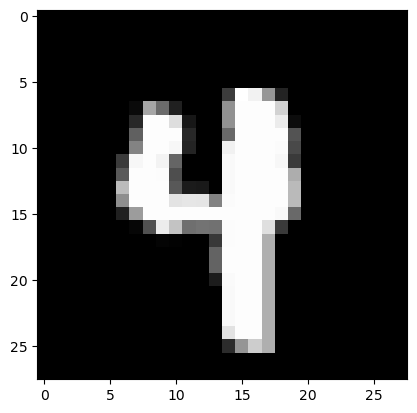

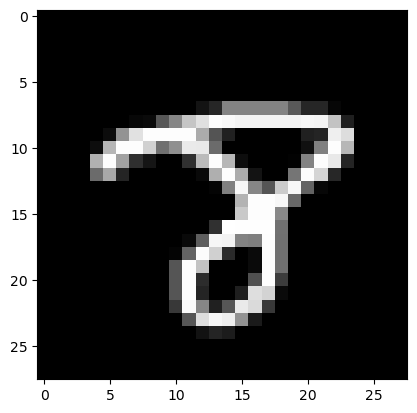

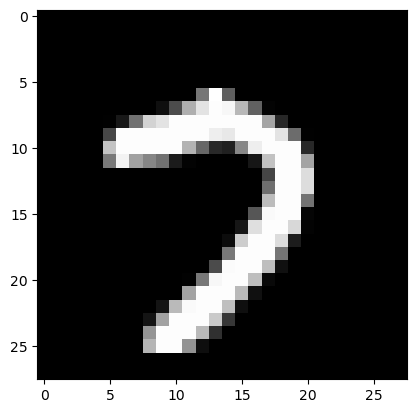

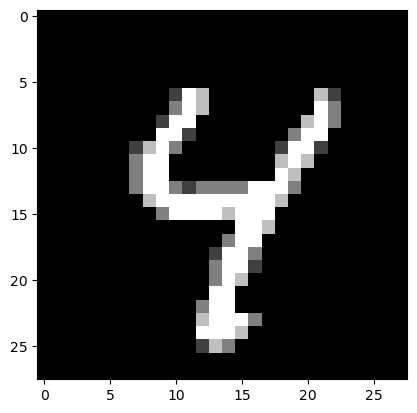

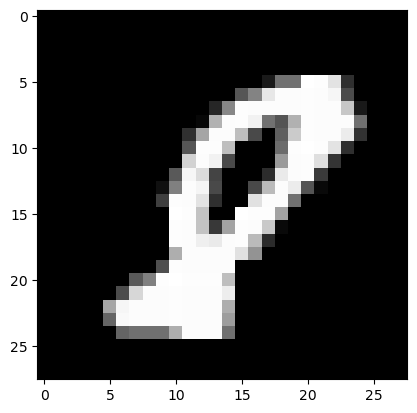

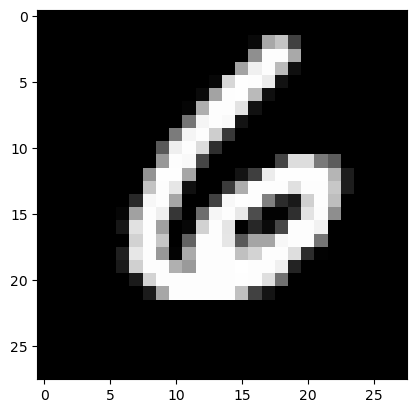

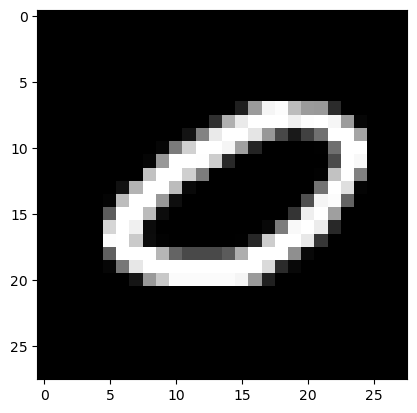

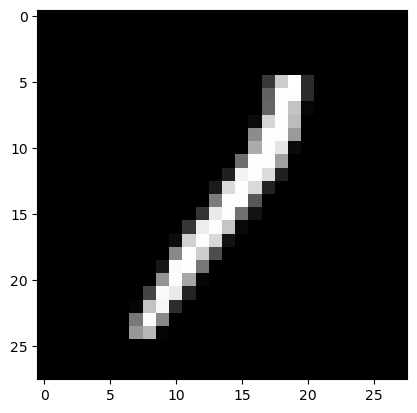

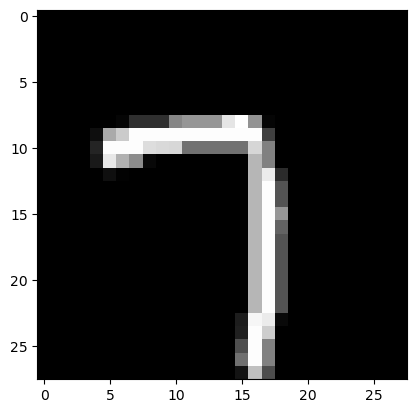

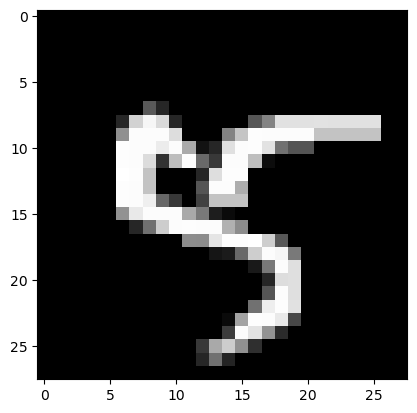

In [7]:
for i in range(10):
    im = np.random.randint(0, len(X_train)-1)
    plt.imshow(pd.DataFrame(X_train).loc[im, :].values.reshape((28, 28)), cmap='gray')
    plt.show()

## Entrenmiento

In [8]:
# Generator network
generator = Sequential([
    Dense(256, input_dim=100, activation='relu'),
    Dense(784, activation='tanh')
])

# Discriminator network
discriminator = Sequential([
    Dense(256, input_dim=784, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002), metrics=['accuracy'])

discriminator.trainable = False

gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002))

In [10]:
def train_discriminator(x_batch, batch_size):
    noise = np.random.normal(0, 1, size=[batch_size, 100])
    fake_images = generator.predict(noise)
    discriminator_loss_real = discriminator.train_on_batch(x_batch, np.ones(batch_size))
    discriminator_loss_fake = discriminator.train_on_batch(fake_images, np.zeros(batch_size))
    discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)
    return discriminator_loss

def train_generator(batch_size):
    noise = np.random.normal(0, 1, size=[batch_size, 100])
    generator_loss = gan.train_on_batch(noise, np.ones(batch_size))
    return generator_loss

In [11]:
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        print(epoch)
        for _ in range(X_train.shape[0] // batch_size):
            x_batch = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]
            discriminator_loss = train_discriminator(x_batch, batch_size)
            generator_loss = train_generator(batch_size)
        
        if epoch % 10 == 0:
            print(f"Epoch: {epoch}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}")
            save_generated_images(epoch)

def save_generated_images(epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.show()

## Resultados

0
4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 5ms/step
Epoch: 0, Discriminator Loss: 0.1453075185418129, Generator Loss: 2.0938923358917236
1/1 [==============================] - 0s 16ms/step


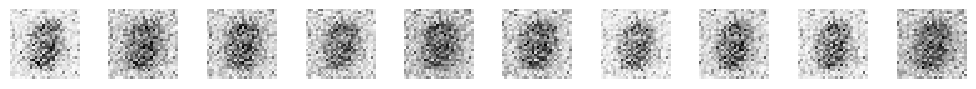

52.96614170074463

In [15]:
epochs = 201
batch_size = 128

train_gan(epochs, batch_size)